### Accessing Data with API's

**OBJECTIVES**

- More with `groupby` and `.agg`
- Data Access via API


### `.groupby` 

The split-apply-combine paradigm we have explored is incredibly powerful and useful tool.  In addition to performing a single aggregate operation, we can use multiple built in or custom aggregate functions.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### The Data

The dataset `salesdaily.csv` contains daily pharmaceutical sales data and the columns are described as follows:

```
M01AB - Anti-inflammatory and antirheumatic products, non-steroids, Acetic acid derivatives and related substances
M01AE - Anti-inflammatory and antirheumatic products, non-steroids, Propionic acid derivatives
N02BA - Other analgesics and antipyretics, Salicylic acid and derivatives
N02BE/B - Other analgesics and antipyretics, Pyrazolones and Anilides
N05B - Psycholeptics drugs, Anxiolytic drugs
N05C - Psycholeptics drugs, Hypnotics and sedatives drugs
R03 - Drugs for obstructive airway diseases
R06 - Antihistamines for systemic use
```

Load in the data and be sure to set a `datetime` index. 

In [ ]:
#read in the data
sales = pd.read_csv('data/salesdaily.csv', index_col = 0, parse_dates=True)
sales.head()

In [ ]:
#look at the info
sales.info()

**EXAMPLE**

How do the daily average sales of `M01AB` compare to those of `NO5B`?  Construct a horizontal bar chart.

In [ ]:
#groupby and then plot -- kind = 'barh'
sales.groupby('Weekday Name')[['M01AB', 'N05B']].mean().sort_values(by = 'M01AB').plot(kind = 'barh');

#### Multiple Summaries with `agg`

Rather than a single aggregate formula, we can use mutliple aggregate functions with the `.agg` method, and pass the functions or common names as strings.  You may also use a custom function.

In [ ]:
#mean and standard deviation
sales.groupby('Weekday Name')[['M01AB']].agg(['mean', 'std', 'median', np.median])

In [ ]:
#custom functino to fine range in data
def lowhi(x):
    return x.max() - x.min()

In [ ]:
#mean, median, range
sales.groupby('Weekday Name')[['M01AB']].agg(['mean', 'median', lowhi])

#### Sparkline Example

In [ ]:
# pip install sparklines

In [ ]:
import sparklines

In [ ]:
#sparklines function
sparklines.sparklines([1, 2, 3, 4,5, 5, 3, 2, 5, 3, 2])

In [ ]:
#apply with mean and standard deviation
sales.groupby('Weekday Name')[['M01AB']].agg(['mean', 'std', sparklines.sparklines])

#### `.resample`

Simlar to groupby, with `datetime` indicies you can group on units of time in your data and aggregate across them.  The `.resample` method works similar to `groupby` in that it splits the data into time chunks, and then you apply an aggreagate method.

In [ ]:
# resample by quarter and examine the mean


## Data Input via APIs

This is about using an api "Application program interface" ...basic idea, allows
direct access to some database or parts of it without having do download everything

Documentation is here...

https://pandas-datareader.readthedocs.io/en/latest/index.html

This documentation is good too:

http://pandas-datareader.readthedocs.io/en/latest/remote_data.html

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import datetime 

In [ ]:
# pip install pandas-datareader

**Quick Example**

Extract five years of 10-year constant maturity yields on U.S. government bonds.

In [ ]:
import pandas_datareader as pdr
matyld = pdr.get_data_fred('GS10')

In [ ]:
#look at top 5 rows
matyld.head()

In [ ]:
#look at info
matyld.info()

**Excercise** Can you find the unemployment rate for the US from FRED. Use the data reader. And create a plot of unemployment from the 2005 on ward. Challenge, can you create a histogram of unemployment rates?

In [ ]:
unemp = pdr.get_data_fred('UNRATE', start = '01-01-2010')
unemp.plot()

#### Other Data Sources and Functionality

The documentation [here](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) shows other sources of data from the datareader.  

In [ ]:
# extract aapl data from yahoo
apple = pdr.get_data_yahoo('AAPL')
apple.head()

In [ ]:
# plot percent change in Adj Close
apple['Adj Close'].pct_change().plot()

In [ ]:
apple.resample('M').mean()['Adj Close'].pct_change().plot()

**Exercise** Grab luluemon's data. Plot the `Adj Close` and the volume since the begining of the year.

In [ ]:
lulu = pdr.get_data_yahoo(['LULU', 'AAPL'])
lulu.head()

In [ ]:
lulu[['Adj Close']].plot()

### Accessing Data Without a Library

In the `pandas_datareader` we have a library written in Python that interacts with data for us.  Sometimes, this is not possible and you will need to interact with the data in a more general environment.  Let's try this out by looking up some information about cats.  Here is the documentation [link](https://developers.thecatapi.com/view-account/ylX4blBYT9FaoVd6OhvR?report=bOoHBz-8t). 

![](images/catapi.png)

In [ ]:
import requests

**Response**

- Random Cat: https://api.thecatapi.com/v1/images/search
- 10 Bengal Cats: https://api.thecatapi.com/v1/images/search?limit=10&breed_ids=beng&api_key=REPLACE_ME

In [ ]:
#url for a random cat
url = 'https://api.thecatapi.com/v1/images/search'

In [ ]:
#request of the url
r = requests.get(url)

In [ ]:
#look at response code
r

In [ ]:
#text of request
r.text

In [ ]:
#examine the json
r.json()

In [ ]:
#repeat for bengal cats
#url
url = 'https://api.thecatapi.com/v1/images/search?limit=10&breed_ids=beng&api_key=REPLACE_ME'
#make request
r = requests.get(url)
#turn into json
r.json()

In [ ]:
#extract the links to images
[cat['url'] for cat in r.json() ]

**Problem**: 

![](https://dog.ceo/img/dog-api-logo.svg)

Head over to the Dog API [here](https://dog.ceo/dog-api/).  

1. Make a request that returns a list of all dog breeds.

2. Make a request that returns a random image of a dog and extract the url.  

### ALPHA VANTAGE

A more detailed example than that of `pandas_datareader`.  The API for Alpha Vantage provides many Forex and Crypto feeds as well as economic and technical indicators.  To use it, you will need an API key -- so head over to [here](https://www.alphavantage.co/#page-top) and let's sign up for one. 

![](images/alpha.png)

In [2]:
import requests

In [37]:
base_url = 'https://www.alphavantage.co/query'
req = requests.get(
    base_url,
    params={
        "function": "TIME_SERIES_DAILY",
        "symbol": "HD",
        "apikey": "LW9XCI6UYMQY5E14",
        "outputsize": "full",
    }
)

In [38]:
import pandas as pd

In [39]:
#examine the response
aapl = pd.DataFrame(req.json()['Time Series (Daily)']).T

In [56]:
url = 'https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers=AAPL&topics=technology&apikey=demo'
r = requests.get(url)
data = r.json()

data['items']

'50'

In [62]:
for i in range(50):
    print(data['feed'][i]['overall_sentiment_score'])

0.150094
0.135774
0.129595
0.118143
0.045599
0.111133
0.156031
0.116612
-0.067805
0.150487
-0.101082
0.090826
0.192957
0.400747
0.336167
-0.055637
0.384182
0.296278
0.118644
0.06909
0.2934
0.1268
0.234528
0.086779
0.102279
-0.108217
0.094999
-0.117384
0.109232
0.315261
0.207594
0.228526
0.00702
0.244022
-0.002354
0.092746
0.093017
0.057315
0.055114
0.138265
0.203803
0.014476
0.132616
0.243732
0.057521
0.104376
0.353088
0.009462
-0.036104
-0.007274


In [40]:
base_url = 'https://www.alphavantage.co/query'
req = requests.get(
    base_url,
    params={
        "function": "TIME_SERIES_DAILY",
        "symbol": "LOW",
        "apikey": "LW9XCI6UYMQY5E14",
        "outputsize": "full",
    }
)

In [41]:
tsla = pd.DataFrame(req.json()['Time Series (Daily)']).T

In [42]:
aapl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5770 entries, 2022-10-05 to 1999-11-01
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   1. open    5770 non-null   object
 1   2. high    5770 non-null   object
 2   3. low     5770 non-null   object
 3   4. close   5770 non-null   object
 4   5. volume  5770 non-null   object
dtypes: object(5)
memory usage: 270.5+ KB


In [43]:
aapl = aapl.astype('float')
aapl.index = pd.to_datetime(aapl.index)

In [44]:
tsla = tsla.astype('float')
tsla.index = pd.to_datetime(tsla.index)

In [45]:
aapl['month'] = aapl.index.month

In [46]:
tsla['month'] = tsla.index.month

In [47]:
import seaborn as sns

<AxesSubplot: xlabel='month', ylabel='4. close'>

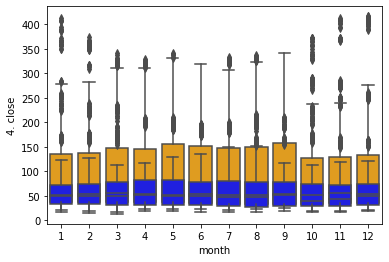

In [54]:
sns.boxplot(data = aapl, x = 'month', y = '4. close', color = 'orange')
sns.boxplot(data = tsla, x = 'month', y = '4. close', color = 'blue')

In [49]:
aapl.resample('M')['4. close'].first()

1999-11-30     76.25
1999-12-31     81.31
2000-01-31     65.19
2000-02-29     62.00
2000-03-31     55.63
               ...  
2022-06-30    297.19
2022-07-31    279.08
2022-08-31    305.82
2022-09-30    293.37
2022-10-31    283.70
Freq: M, Name: 4. close, Length: 276, dtype: float64

In [ ]:
#extract the headline
base_url = 'https://www.alphavantage.co/query'
req = requests.get(
    base_url,
    params={
        "function": "NEWS_SENTIMENT",
        "symbol": "AAPL",
        "apikey": "LW9XCI6UYMQY5E14"
    }
)
req.json()

**Exercise**

Use the `TIME_SERIES_DAILY` endpoint to extract data for `AAPL`. 

### Different Endpoints

Let's explore some news about Apple.  The documentation on the news & sentiment endpoint is [here](https://www.alphavantage.co/documentation/#news-sentiment). 

In [ ]:
base_url = 'https://www.alphavantage.co/query'

In [ ]:
#news about AAPL


**PROBLEM**: Extract weekly data for bitcoin (`BTC`) from the Cryptocurrency endpoint in Alpha Vantage.


#### API Wrappers

Often, someone has written a library to wrap the API.  For example, there is an alpha vantage Python API wrapper:

- https://github.com/RomelTorres/alpha_vantage

Let's head over, install the library, and retrieve some intraday returns.

#### Summary

Great job!  Now, you have additional tools for going out and accessing data from a variety of sources.  Your homework this week will involve extracting further information from the API's and visualizing this with `seaborn` and `matplotlib`.